In [1]:
import tensorflow as tf

In [2]:
model = tf.keras.models.load_model("model.h5", compile=False)

2022-03-15 09:09:58.177963: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-15 09:09:58.215501: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 128, 128, 64) 1792        input_5[0][0]                    
__________________________________________________________________________________________________
activation_51 (Activation)      (None, 128, 128, 64) 0           conv2d_28[0][0]                  
__________________________________________________________________________________________________
conv2d_29 (Conv2D)              (None, 128, 128, 64) 36928       activation_51[0][0]              
____________________________________________________________________________________________

In [6]:
import matplotlib.pyplot as plt
import cv2

In [7]:
def load_image(path):
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    image = cv2.resize(image, (128, 128))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.astype("float32")
    image = image / 255.
    return image

In [8]:
image = load_image("274061093_3162428644082257_5756342189964858814_n.jpg")

In [12]:
import sys

sys.getsizeof(image)

196744

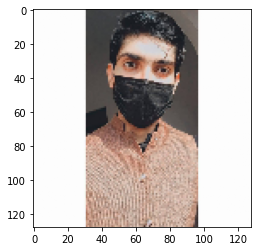

In [10]:
plt.imshow(image)

In [9]:
prediction = model.predict(tf.expand_dims(image, 0))

2022-03-15 09:12:20.785509: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


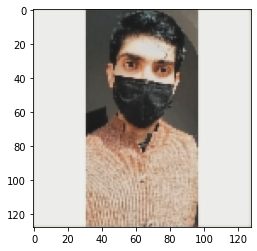

In [11]:
plt.imshow(prediction.reshape(128, 128, 3))

In [13]:
sys.getsizeof(prediction.reshape(128, 128, 3))

136